| [Intro Octave 1](intro_octave_1.ipynb)| Revenir à la [page déroulement](../README.ipynb) |---|
|-------------|---|---|

---
---
# Intro. Octave 2 : CORRIGÉ ( -> [Sujet](./intro_octave_2.ipynb))
--- 

--- 


---
Apprendre à :
 - faire simple avec les interfaces utilisateur : config de script au début
 - faire des fonctions explicite
 - utiliser les fonctions anonyme
 - calcul numérique d'intégrale de 3 manières différentes
 

## Déclaration de fonctions explicites (obsolète)

Pour déclarer une fonction en octave cela est similaire au langage ada.



Prenons l'exemple de la fonction qui calcule la valeur de l'onde complexe.

$f : x \mapsto e^{i.\omega.x}$ 

Remarquons que cette fonction dépend d'un paramètre $\omega$.


In [5]:
omega = 4;

function y = f(x)
    y = exp(i*omega*x)
end

f(3)

error: 'omega' undefined near line 2 column 15
error: called from
    f at line 2 column 7


Et oui, en informatique  un paramètre doit être donné explicitement ou bien déclaré comme visible partout (dangereux)!

On peut donc définir de deux manière une fonction paramétrée :
   - `fomega(x)` qui est paramétrée par une variable globale `omega`  (effets de bord dangereux !)
   - `f(x,omega)` qui est une fonction de deux variables (passage explicite)

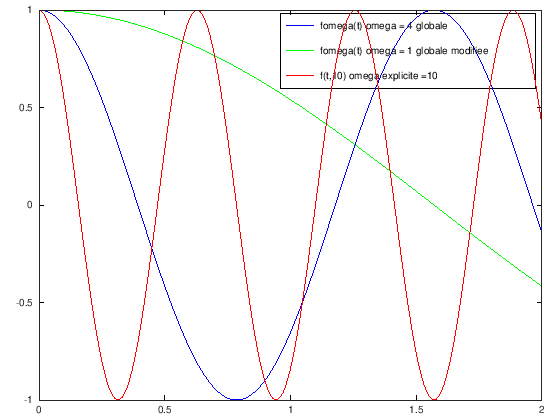

In [223]:
clear all;
global omega=4;
t=0:0.01:2;

function y = fomega(x)
    global omega;
    y = exp(i*omega*x);
end

function y = f(x, omega)
    y = exp(i*omega*x);
end

plot(t,fomega(x=t),'b');
hold on;

omega=1;
plot(t,fomega(x=t),'g');

plot(t,f(x=t, w=10),'r');
legend(["fomega(t) omega = 4 globale";"fomega(t) omega = 1 globale modifiee";"f(t,10) omega explicite =10"])

On peut mettre une fonction dans un fichier du même nom par exemple ici `fomega.m` et `f.m`.

Si ces fichiers sont **dans le même répertoire que le script** alors ce script peut les utiliser sans déclarations.

## Fonctions anonymes
---

Une fonction mathématique qui s'exprime  en une ligne de calcul peut être   
 **déclarée en une seule ligne**.
 

 > Syntaxe de la déclaration avec @   
 > @(x,y,z)  <expression mathématique en fonction de x,y,z>   
 > Par exemple:   
 > `@(x)  x * x` est la fonction de $\mathbb{C}\to\mathbb{C}$ de graphe $x\mapsto x^2$   
 
 On peut la vectoriser avec :   
  `@(x)  x .* x`   
par polymorphisme x peut ainsi être un scalaire, un vecteur réel , un vecteur complexe, une matrice 2D, etc.  
On obtiendra ainsi le carré du scalaire, le vecteur du carré de chaque élément, la matrice des carrés de chaque élément etc.
 
Remarquez que cette fonction n'as pas de nom !  (`@` pour anonyme avec matlab/octave, `lambda` en python donnera `lambda x : x * x`) 

>**En général on nomme une fonction anonyme avec =**, ce qui donne  :  
> `f = @(x) x .* x` 

Ne pas nommer une fonction peut servir lorsque l'on doit passer une fonction en argument à une commande.
Par exemple la fonction `quad` permet d'intégrer une fonction (pas un tableau de valeurs) avec une méthode numérique avancée (faire `help quad` pour les détails). 
 

In [224]:
quad( @(x) x, 1, 2)   % Intégrer l'"x" de l'année 1 à 2 de prépa = 3/2
quad( @(x) x, 2, 3)   % Intégrer l'"x" de l'année 2 à 3 de prépa = 5/2
quad( @sin,0,pi)      % intégrer sin sur une demi alternance : @sin <-> "la fonction sin"
                    %                                          sin <-> appelle la fonction sin
disp("la méthode numérique n'intègre pas des complexes :")
quad( @fomega,0,pi) %  notre fonction fomega s'intègre aussi mais c'est une fonction dans C !
% donnons un nom à une fonction anonyme
puissance = @(x) sin(x).^2;
energie_periode = quad( puissance, 0, 2*pi) % énergie d'une période de sin 
puissance_moyenne = energie_periode / (2*pi)

ans =  1.5000
ans =  2.5000
ans =  2
la méthode numérique n'intègre pas des complexes :
ans =    4.9226e-17
energie_periode =  3.1416
puissance_moyenne =  0.50000


### Sans effets de bord 

Attention ! Cette déclaration peut utiliser une valeur de paramètre **au moment où elle est déclarée**.

On peut avoir des surprises et mieux vaux passer tous les paramètres explicitement.

Reprenons notre fonction f :

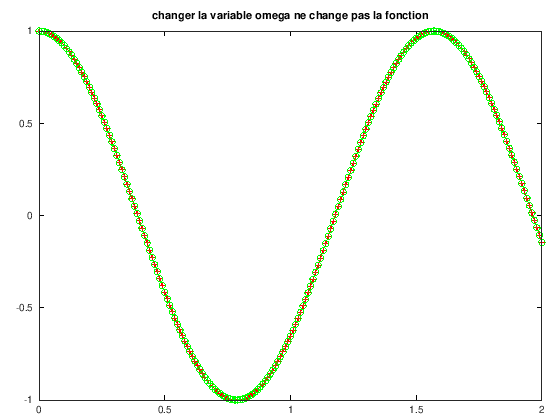

In [9]:
omega = 4;

f = @(x) exp(i*omega*x) ;  % vectorisée puisque omega est scalaire

plot(t,f(t),'r+-');
hold on;

omega = 10;
plot(t,f(t),'go');

title("changer la variable omega ne change pas la fonction")

Et oui ! lors de la déclaration de la fonction f, omega vallait 4.
La déclaration est exactement équivalente à `f = @(x) exp(i*4*x)` car à ce moment `omega` vallait 4.

> Changer la valeur de omega ensuite, ne change pas la fonction f...

Mieux vaut passer plusieurs paramètres explicitement.   
Ou bien  déclarer une fonction par valeur de paramètre !

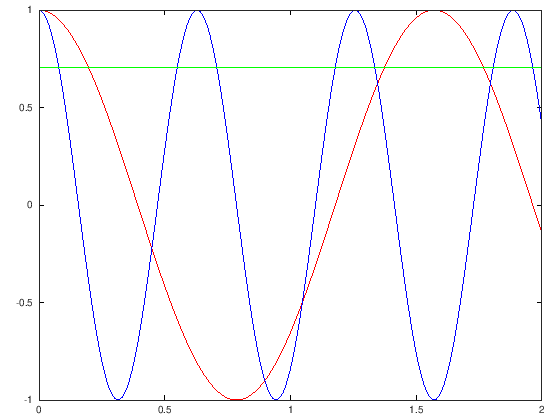

In [60]:
f = @(x,w) exp(i*w*x) ;
omega = 4;
f_de_t = f(x=t, w=omega);    % passage explicite des params
plot(t,f_de_t,'r');

hold on;
omega = 10;    
plot(t,f(t,omega),'b');         % passage implicite par ordre

% Déclarons la fonction pour omega =0 
% C'est donc la fonction constante
constante = @(x) f(x=x,w=0); % vectorisée si f(x,w) vectorisée
plot(t,sqrt(2)/2*constante(t),'g')

Remarquez bien qu'en informatique comme en mathématique, il ne faut pas confondre
  - la fonction $\vec{f}:\mathbb{R^2}\to \mathbb{R}$ mathématique associée en informatique à la fonction anonyme `f`
  - l'évaluation la fonction $f(x,w)\in\mathbb{R}$ mathématique qui est une variable ou un tableau `f_de_t` ou `f(t)`dans cet exemple.
  

In [10]:
t=0:4;
f_de_t=f(t,1);
f
f_de_t
f(x=0,w=1)
f(4,1)

f =

@(x) exp (i * omega * x)

f_de_t =

 Columns 1 through 3:

   1.00000 + 0.00000i  -0.65364 - 0.75680i  -0.14550 + 0.98936i

 Columns 4 and 5:

   0.84385 - 0.53657i  -0.95766 - 0.28790i

ans =  1
ans = -0.95766 - 0.28790i


## Exercice fonctions anonymes

On a définit la fonction de heaviside $\vec{u}$ on aimerait définir la fonction rampe $\vec{r} : x\mapsto x.u(x)$


u_de_moins_10 = 0
u_de_0 = 1
u_de_t =

  0  1  1  1

ans = -0
ans =  10
r_de_t =

  -0   0   1   2



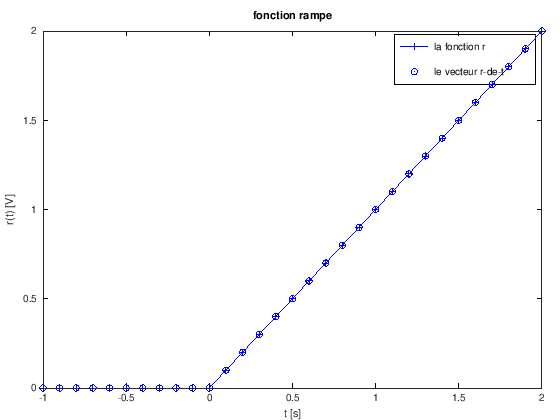

In [257]:
clear all;
t=-1:2;  % t = [-1; 0; 1; 2]

% Définition de l'échelon u
u = @(x) (x >= 0);
u_de_moins_10 = u(-10)
u_de_0 = u(0)

%% VOTRE CODE u_de_t= évaluant u pour chaque valeur du tableau t 
%%   il utilise la vectorisation de l'opérateur >= et la diffusion de 0
u_de_t = u(t)

%% VOTRE CODE r = déclarant la fonction rampe 
r = @(x) u(x).*x;
r(-10)
r(10)
r_de_t = r(t)


%% CORRIGER l'affichage 
t=-1:0.1:2;
plot(t,r(t),'b-+'); hold on;
%% il faut mettre à jour r_de_t et recalculer
r_de_t = r(t);
plot(t,r_de_t,'bo');
xlabel("t [s]"); ylabel("r(t) [V]"); title("fonction rampe")
legend(["la fonction r";"le vecteur r-de-t"])

On veut définir:
  - une fonction causale $\vec{f_1} =\frac{3}{2}\vec{u}-\vec{r}$, 
  - sa fonction antipodale (symétrique dans le temps) et donc anti-causale $\vec{f_2}=\vec{f_1}\left(-\bullet\right)~: t\mapsto f_1(-t)$.  
  Remarquez que la variable $t$ est muette et aurait pu être $x\mapsto f_1(-x)$ d'où la notation $\vec{f_1}(-\bullet)$
  - et la fonction non causale $\vec{f}=\vec{f_1}-\vec{f_2}$ 
 
 Et les tracer pour un temps $t$ allant de -3 à 3

val_de_f1 =  10
val_de_f1a =  1.5000
ans =  31
ans =  61


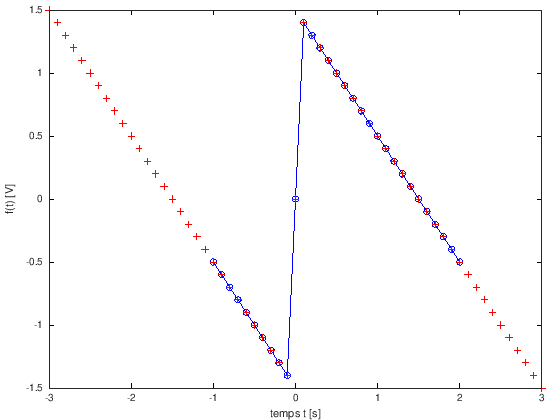

In [216]:
a=10;
%% VOTRE CODE f1 : x |-->   à partir des fonctions u, r et du scalaire a 
f1 = @(x) a*u(x)-r(x);

%% VOTRE CODE f1a : (x,a)  |--> à partir de u et r mais fonction de x et de a
f1a = @(x,a) a*u(x)-r(x);

a=3/2; % On redéfinit a et on évalue f1(0) et f1a(0)
val_de_f1 = f1(0)
val_de_f1a = f1a(0,a) % là f1 est redéfinie avec la bonne valeur de a

%% VOTRE CODE f2 =  à partir de f1a (variable muette t) on garde a=3/2
f2 = @(t) f1a(-t,a);
%%VOTRE CODE f= à partir de f1a et f2 (variable muette "bernardo")
f = @(bernardo) f1a(bernardo,a) - f2(bernardo);

t=-1:0.1:2;
%% VOTRE CODE f_de_t=... le vecteur des valeur de f pour les temps de t
f_de_t = f(t);

%%VOTRE AFFICHAGE de f_de_t avec t pour abscisse , en "ronds bleus" avec titre légende des axes etc
plot(t,f_de_t,'ob-');
xlabel("temps t [s]")
ylabel("f(t) [V]")
hold on; %pour ne pas effacer
t = -3:0.1:3; % on elargit le temps

%%VOTRE AFFICHAGE "en petits + rouges" de t |--> f(t) à partir de la fonction f
plot(t,f(t),'r+');

length(f_de_t)  % Ne recalcule pas ! c'est en mémoire
length(f(t))    % Recalcule tout à chaque fois !

### En bonus / série de Fourier



voici un exemple de code qui calcule la somme partielle de la série de fonction $\vec{S_n} = \Sigma a(n) . \vec{\omega_n}$  avec $a(n) = \frac{1}{n}$:

$S_2(t) = a(1).\overbrace{cos(2\pi.F_0.t)}^{\omega_1(t)} + a(2).\overbrace{cos(2\pi.2.F_0.t)}^{\omega_2(t)}$

$\dots$ 

$\vec{S_N}=\sum\limits_{n=1}^{n=N} a(n).\overbrace{\cos(2\pi.F_0.\bullet)}^{\vec{\omega_n}}$


Remarquez bien la différence entre la fonction $\vec{S_2}$ représentée par la fonction anonyme `S2`  
et l'évaluation $S_2(t)\in\mathbb{R}$ de cette fonction représentée par le tableau de réels `S2_de_T`   

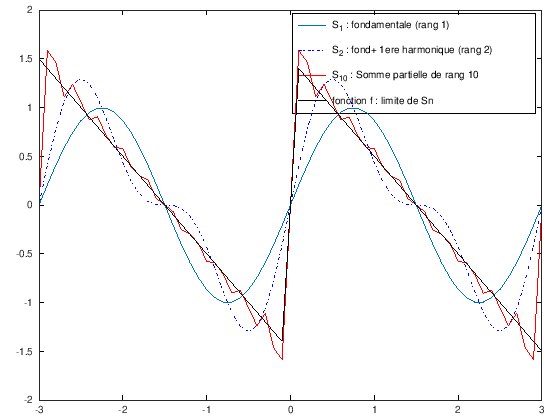

In [217]:
T0=3;F0 = 1/T0;  % période de 3 secondes
n=1:10;
a= 1./n; % coefs de Fourier [1, 1/2, 1/3, ...]
w1 = @(x) sin(2*pi*F0*x);
w2 = @(x) w1(2*x);

S2 = @(x)  a(1)*w1(x) + a(2)*w2(x);
S2_de_t = S2(t);
plot(t,a(1)*w1(t)); hold on;
plot(t,S2_de_t,'b-.')

w = @(x) sin(2*pi*x);
wn= @(n,x) w(F0*x*n);

Sn_de_t = 0*t; % vecteur de zéros (autant de valeur que dans t)
Sn = @(x) (0); % fonction nulle x |--> 0


for n=n
    %plot(t,f_de_t,'r--');hold on;
    Sn = @(x) Sn(x)  + a(n)*wn(n,x);    % Redéfinition de la fonction Sn EN FONCTION de Sn !
    Sn_de_t = Sn_de_t + a(n)*wn(n,t);   % Somme des valeur à partir de la somme des valeurs !
 
end

plot(t,Sn(t),'r')
plot(t,f(t),'k')
legend(["S_1 : fondamentale (rang 1)";
        "S_2 : fond+ 1ere harmonique (rang 2)";
        "S_{10} : Somme partielle de rang 10";
        "fonction f : limite de Sn"])


Si l'on change le vecteur temps `t` ($\pm 3$s)  pour l'agrandir en un vecteur `tt` doublé ($\pm 6$s), on voit que la fonction $f$ n'est pas périodique et est approchée sur le support $\left[-3,\;3\right]$ par $S_n$ qui est périodique. 

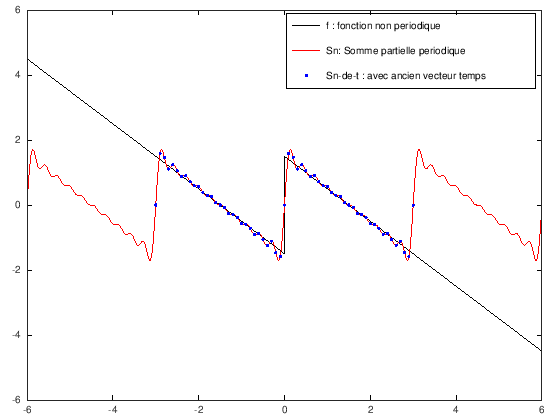

In [218]:
tt = -6:0.01:6;
plot(tt,f(tt),'k'); hold on;
plot(tt,Sn(tt),'r');
plot(t,Sn_de_t,'b.');
legend(["f : fonction non periodique";"Sn: Somme partielle periodique";"Sn-de-t : avec ancien vecteur temps"])


## Interface utilisateur
---

En Ada ou avec des **programmes compilés** on est obligée de demander à l'utilisatrice de donner des valeurs avec une interface etc.

En langage interprété on fait **des scripts** simple et **l'utilisatrice modifie directement le fichier script !** 

La partie [exemple pénible](#Exemple-p%C3%A9nible) montre comment on fait un script compliqué voire impossible en voulant bien faire. **Vous n'êtes pas obligé de la lire**

Mieux vaut voir comment on fait simplement quand on fabrique des scripts avec la partie [smart and easy](#Version-smart-and-easy) 


### Version smart and easy

> L'[exemple pénible](#Exemple-p%C3%A9nible) montre que demander à chaque fois de rentrer des valeurs est pénible et
> qu'il est impossible de demander de rentrer une fonction mathématique lors de l'exécution du programme...

Comme l'utilisatrice doit lancer octave et ouvrir votre fichier script,

> **on demande toujours à l'utilisatrice de configurer directement le script** avant de l'exécuter

Voilà à quoi ressemble le script idéal :

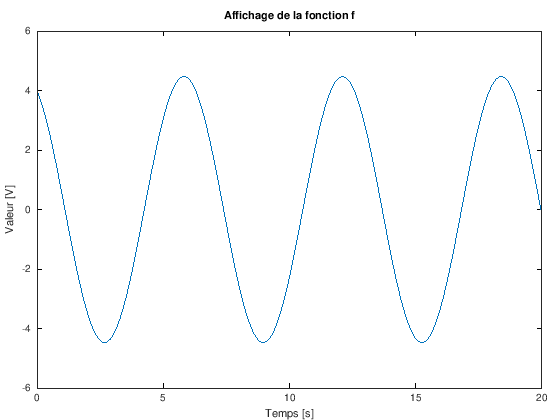

In [227]:
clear all;  % efface le "workspace" de variables
close all;  % ferme les fenètres graphiques
clc;        % efface la console
%%_________
%% script qui affiche une fonction donnée

%% <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
%% UTILISATRICE CONFIGUREZ ICI LE SCRIPT
tmin = 0 ;  % premier instant affiché [s]
tmax = 20 ;  % dernier instant affiché [s]
Te =  0.1;  % période d'échantillonnage

%% fonction de x à afficher
%% décommentez une ligne
%fonction = @(x) 3*x + 4*cos(x)  ;
fonction = @(x) 4*cos(x)-2*sin(x)  ;
%fonction = @(x) 4*cos(1./x)  ;
%fonction = @(x) <votre fonction vectorisée de x>

%% FIN DE CONFIGURATION
%% >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

%% Calculs
t = tmin:Te:tmax ;
f_de_t = fonction(t) ;

%% Affichage
plot(t,f_de_t);
xlabel('Temps [s]');
ylabel('Valeur [V]');
title('Affichage de la fonction f')


> **L'utilisatrice a le code source, sait exécuter un script et connait le langage**   
alors ne pas s'embêter.

### Exemple pénible

Lisez cette section si vous voulez comprendre pourquoi "c'est pas bien" de demander à l'utilisatrice des valeurs etc.

On montre ici comment on fait des choses trop compliquée voire impossible...


> **Mieux vaut voir comment on fait bien et aller direct à la partie suivante [smart and easy](#Version-smart-and-easy)**


Sinon, prenons l'exemple d'un programme qui calcule un produit sclaire entre deux vecteurs. Faisons le pénible !

Exécutez cette céllule et demandez un vecteur de dimension 3 avec deux fois le vecteur 1, 2,3

In [220]:
clear all;
N = input("Dimension du vecteur");

for id = 1:N
    u(id) = input(["Valeur de l'element de rang ",num2str(id)]);
end

disp("Pour le deuxième vecteur :")
for id = 1:N
    v(id) = input(["Valeur de l'element de rang ",num2str(id)]);
end

disp("Le produit scalaire")
u'
disp("fois")
v
disp("=")
u'*v

Dimension du vecteur 10
Valeur de l'element de rang 1 1
Valeur de l'element de rang 2 2
Valeur de l'element de rang 3 3
Valeur de l'element de rang 4 2
Valeur de l'element de rang 5 3
Valeur de l'element de rang 6 1
Valeur de l'element de rang 7 2
Valeur de l'element de rang 8 3
Valeur de l'element de rang 9 1
Valeur de l'element de rang 10 1


Pour le deuxième vecteur :


Valeur de l'element de rang 1 1
Valeur de l'element de rang 2 1
Valeur de l'element de rang 3 1
Valeur de l'element de rang 4 1
Valeur de l'element de rang 5 1
Valeur de l'element de rang 6 1
Valeur de l'element de rang 7 2
Valeur de l'element de rang 8 3
Valeur de l'element de rang 9 4
Valeur de l'element de rang 10 5


Le produit scalaire
ans =

   1
   2
   3
   2
   3
   1
   2
   3
   1
   1

fois
v =

   1   1   1   1   1   1   2   3   4   5

=
ans =

    1    1    1    1    1    1    2    3    4    5
    2    2    2    2    2    2    4    6    8   10
    3    3    3    3    3    3    6    9   12   15
    2    2    2    2    2    2    4    6    8   10
    3    3    3    3    3    3    6    9   12   15
    1    1    1    1    1    1    2    3    4    5
    2    2    2    2    2    2    4    6    8   10
    3    3    3    3    3    3    6    9   12   15
    1    1    1    1    1    1    2    3    4    5
    1    1    1    1    1    1    2    3    4    5



**Zut le produit est dans le mauvais sens** (3,1)x(1,3) et donne une matrice (3,3) et non un scalaire.

Corrigez l'erreur et re-exécutez avec les mêmes valeurs

In [2]:
%% CORRIGER LE CODE 
% pour avoir un produit (1,3)x(3,1)=(1,1) scalaire
clear all;
N = input("Dimension du vecteur");

for id = 1:N
    u(id) = input(["Valeur de l'element de rang ",num2str(id)]);
end

disp("Pour le deuxième vecteur :")
for id = 1:N
    v(id) = input(["Valeur de l'element de rang ",num2str(id)]);
end

disp("Le produit scalaire")
u'
disp("fois")
v
disp("=")
u*v'

Dimension du vecteur 3
Valeur de l'element de rang 1 1
Valeur de l'element de rang 2 2
Valeur de l'element de rang 3 3


Pour le deuxième vecteur :


Valeur de l'element de rang 1 1
Valeur de l'element de rang 2 2
Valeur de l'element de rang 3 3


Le produit scalaire
ans =

   1
   2
   3

fois
v =

   1   2   3

=
ans =  14


**Pénible hein !** de répéter les saisies à chaque fois...

Maintenant supposons que l'on veut demander à l'utilisatrice de donner une fonction à appliquer au produit scalaire.

Cela ressemblerait au code ci-dessous mais de plus on ne saurait pas le poursuivre !

In [3]:
%% CORRIGER LE CODE 
% pour avoir un produit (1,3)x(3,1)=(1,1) scalaire
clear all;
disp('Programme qui affiche une fonction')
tmin = input("Entrez le tmin =");
tmax = input("Entrez le tmax = ");
Te = input("Entrez la periode d'echantillonnage =");
t=tmin:Te:tmax;

fonction = input("Entrez la fonction à afficher : ""3*x + 4*cos(x)"" par exemple","s");

fonction(0)
fonction(t)


Programme qui affiche une fonction


Entrez le tmin = 0
Entrez le tmax = 5
Entrez la periode d'echantillonnage = 0.1
Entrez la fonction à afficher : "3*x + 4*cos(x)" par exemple 3*x


error: fonction(0): subscripts must be either integers 1 to (2^31)-1 or logicals
error: fonction(0): subscripts must be either integers 1 to (2^31)-1 or logicals


**Impossible !** il faudrait transformer la chaine de caractère `fonction` en fonction octave...

Comment demander à octave de transformer la chaine de caractère rentrée en une fonction ? 
> on est bloqué.


## Exercice interface
---

Le script ci-dessous fonctionne mais mélange tout et demande des saisies pénibles à l'exécution (essayez-le). Faites un script smart !


Son but est d'illustrer le concept de phaseur (voir [FREQ1 phaseurs](FREQ1_phaseurs.ipynb) ). 

De retrouver le phaseur  de cosinus et sinus et de s'en servir pour trouver le phaseur $z_f$ de n'importe quelle onde pure de la forme~:
$$ f(t) = \rho.\cos(\omega.t+\phi) $$
$$ \quad = a.\cos(\omega.t)+b\sin(\omega.t)$$
$$ \quad = \mathcal{R}\left[ z_f.e^{i.\omega.t}\right]$$
$$ \quad = c.e^{\omega.t} + \overline{c}.e^{-i.\omega.t}$$

Modifiez-le en version smart avec une partie configuration pour que l'utilisatrice puisse rentrer :
  - une valeur numérique de a et de b
  - le phaseur de Cos 
  - le phaseur de Sin
  - la formule donnant le phaseur zf en fonction de a et b

L'affichage de vérification se fait en final après les calculs. 

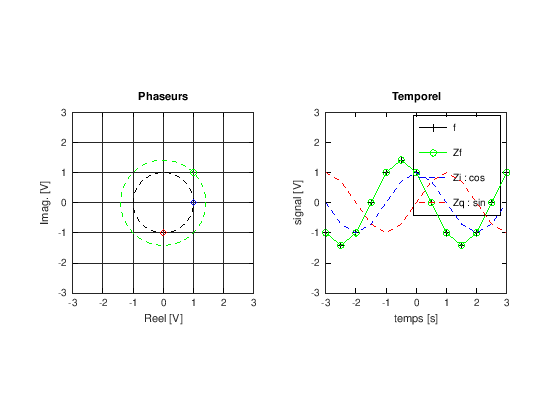

In [ ]:
clear all;
close all;

%%______________________________________
%% Programme qui permet de comparer la forme
%% f(t)= a cos (w.t) + b sin(wt)
%% pour a et b donné 
%% avec une forme en phaseur
%%   = Réel[ Zf . exp(i.w.t] ]
%% où Z est un nombre complexe 

%% <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
%% Utilisatrice, configurez ces lignes SVP
a = 1 ;   % amplitude du cos 
b = -1;   % amplitude  du sin
% Utilisatrice, donne ici les phaseurs
% Zi = In phase du cos => cos
Zi = 1;   
% Zq = Quadrature phase du cos => sin
Zq = - i; % i donnerait -sin ! 
% Utilisatrice mets ici ton calcul de Zf(a,b)
Zf = a*Zi+b*Zq;
%% Fin de la zone de configuration
%% >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


%% Affichage des phaseurs
%%________________________

subplot(121) % figure de gauche

%tracé du cercle unitaire
teta=0:0.1:2*pi;
plot(real(exp(i*teta)),imag(exp(i*teta)),'k--');hold on;
% phaseur In phase (cos) 
plot(real(Zi),imag(Zi),'db'); % un "diamand bleu"
% phaseur Quadrature phase (sin) 
plot(real(Zq),imag(Zq),'dr'); % un "diamand rouge"
% phaseur de l'onde pure f et de son cercle
plot(real(Zf),imag(Zf),'og'); % rond vert
plot(real(Zf*exp(i*teta)),imag(Zf*exp(i*teta)),'g--');

axis ([-3, 3, -3, 3], "square");
grid on;
xlabel('Reel [V]');
ylabel('Imag. [V]');
title('Phaseurs');

%% Affichage temporel
%%________________________

subplot(122)
t=-3:0.5:3; 
% onde pure A.cos + b.sin noir
plot(t,a*cos(pi/2*t)+b*sin(pi/2*t),'k+-'); hold on;

% onde pure Real(Zf.exp) vert
plot(t,real(Zf*exp(i*pi/2*t)),'go-'); 
% cosinus bleu
plot(t,cos(pi/2*t),'b--');
%sinus rouge
plot(t,sin(pi/2*t),'r--');
xlabel('temps [s]');
ylabel('signal [V]');
title('Temporel');
axis ([-3, 3, -3, 3], "square");
legend(["f";"Zf";"Zi : cos";"Zq : sin"]);


